In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [23]:
path = r"C:\Users\Abhilash\Desktop\Data Trained\Projects\Dataset\Telecom_customer_churn.csv"
import chardet
with open (path,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result    

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
data = pd.read_csv(path,encoding = 'ascii')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
#We are having 7043 rows and 21 columns

In [24]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
#We can see all the columns here 

In [25]:
#Let me check for the missing values
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
#I see no mo missing values

In [26]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [27]:
#We wont have the values for the string


In [28]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [29]:
#We see the data is bit imbalanced
# 5174 customers did not churn
# 1869 customer churned up.

<AxesSubplot:xlabel='Churn', ylabel='count'>

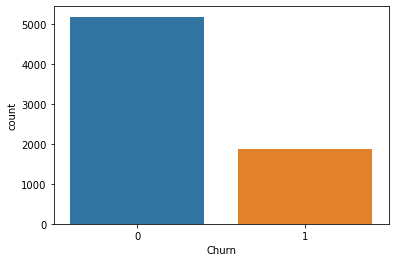

In [30]:
sns.countplot(data['Churn'])

<AxesSubplot:xlabel='gender', ylabel='count'>

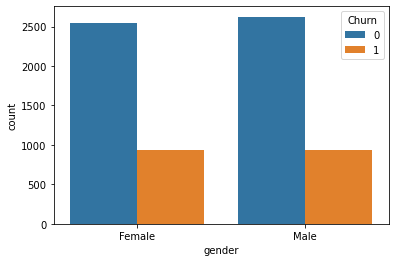

In [36]:
sns.countplot(x='gender' , hue = 'Churn' , data=data)

In [37]:
#above is the churn data for both males and females

<AxesSubplot:xlabel='InternetService', ylabel='count'>

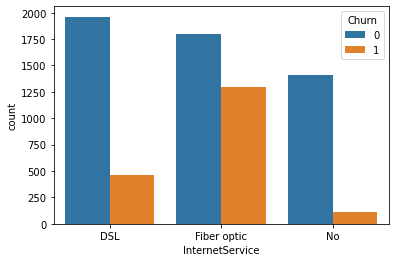

In [38]:
sns.countplot(x='InternetService' , hue = 'Churn' , data=data)

In [39]:
#above is the churn data for Internet Service

array([<AxesSubplot:title={'center':'tenure'}>,
       <AxesSubplot:title={'center':'MonthlyCharges'}>], dtype=object)

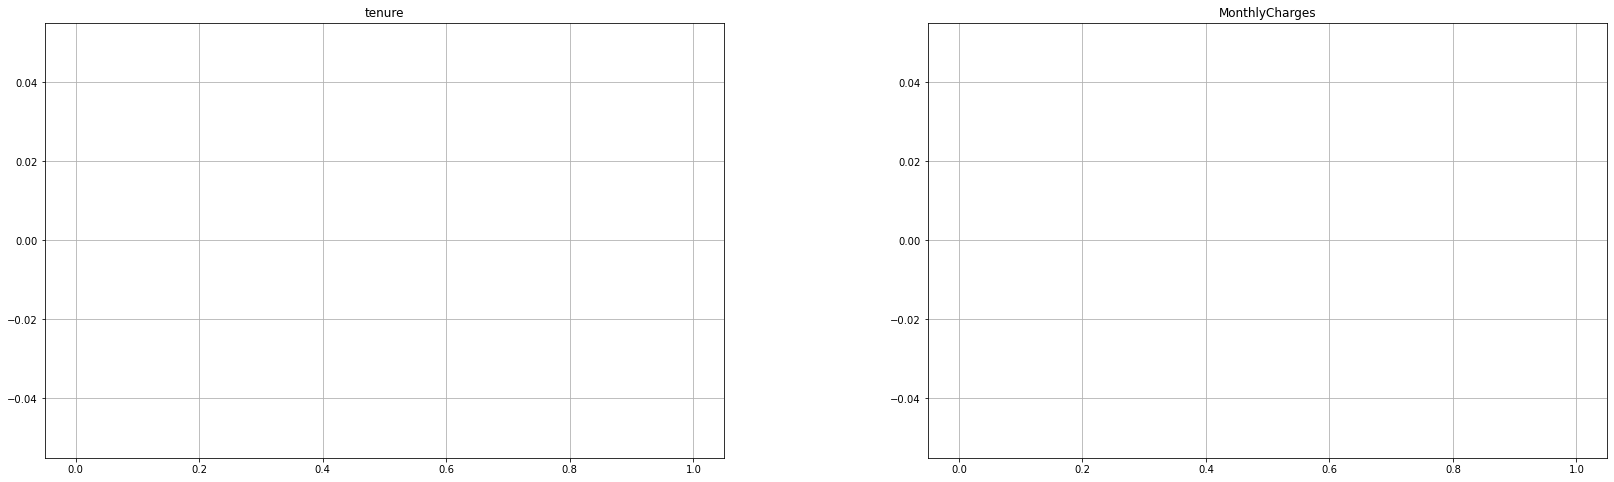

In [43]:
numerical_features = ['tenure','MonthlyCharges']
fig , ax = plt.subplots(1,2,figsize=(28,8))
data[data.Churn=='No'][numerical_features].hist(bins=20,color='blue',alpha=0.5 , ax=ax)
data[data.Churn=='Yes'][numerical_features].hist(bins=20,color='orange',alpha=0.5 , ax=ax)




array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>, <AxesSubplot:>]],
      dtype=object)

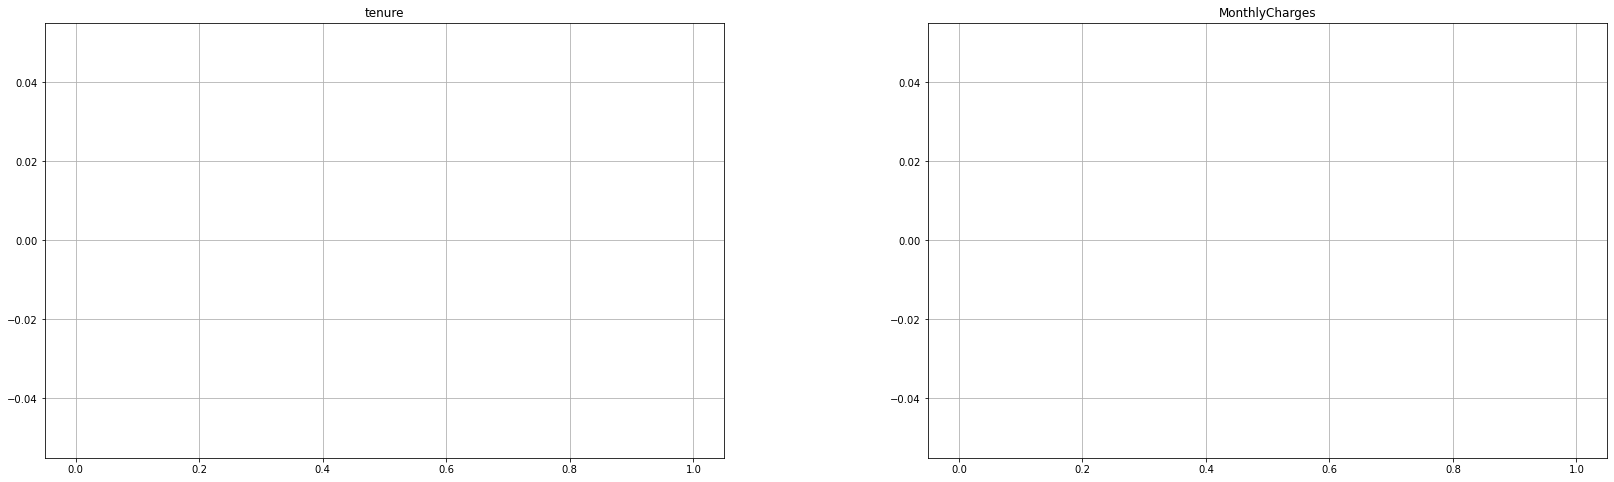

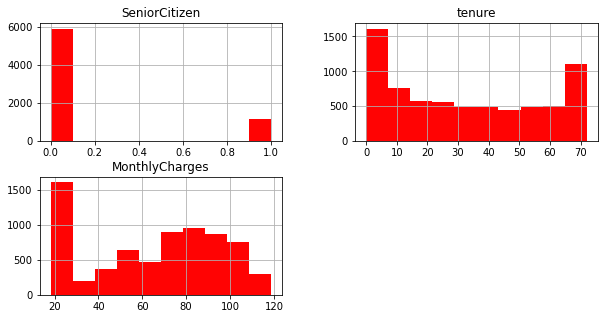

In [50]:
numerical_features = ['tenure','MonthlyCharges']
fig , ax = plt.subplots(1,2,figsize=(28,8))
data[data.Churn=='No'][numerical_features].hist(bins=20, ax=ax)
data[data.Churn=='Yes'][numerical_features].hist(bins=20, ax=ax)

data.hist(color='r',alpha=0.99,figsize=(10,5))

In [52]:
#Lets remove all unnecessary columns
cleaned_data = data.drop('customerID',axis=1)

In [53]:
cleaned_data.shape

(7043, 20)

In [54]:
#We have to convert all the strings to  numeric :

for column in cleaned_data.columns:
    if cleaned_data[column].dtype == np.number:
        continue
    cleaned_data[column] = LabelEncoder().fit_transform(cleaned_data[column])    

In [55]:
cleaned_data.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [56]:
#Now we see all the data in numbers

In [57]:
cleaned_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [59]:
x= cleaned_data.drop('Churn',axis=1)
y=cleaned_data['Churn']

In [60]:
scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

# Logistic Regression

In [62]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [65]:
y_pred = lr.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8147622427253371

In [68]:
#We found the accuracy of 81.47%

# Random Forrest Regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train , y_train)

RandomForestRegressor()

In [70]:
y_pred = reg_rf.predict(x_test)

In [71]:
reg_rf.score(x_train , y_train)

0.891398701309264

In [73]:
#Here we are getting a better that is 89.13%

# Random Forrest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [75]:
#Randomforest classifier
rff = RandomForestClassifier(random_state = 0)
rff.fit(x_train, y_train)

y_pred_train = rff.predict(x_train)
y_pred_test = rff.predict(x_test)

#Accuracy score
print('Accuracy score for test data using Random Forest :', accuracy_score(y_test,y_pred_test))

Accuracy score for test data using Random Forest : 0.7927608232789212


In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [77]:
print(confusion_matrix(y_test,y_pred_test))

[[944  92]
 [200 173]]


In [78]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [79]:
#AUC ROC Curve
from sklearn import metrics
probs = rff.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

In [80]:
roc_auc

0.8335873694452783

In [81]:
#We are having almost 83.35%

# Gradient Boosting technique

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [83]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred = gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict = True))
print("\n================Train Result===========")
print(f"Accuracy score : {accuracy_score(y_train , pred)*100:.2f}%")
print("------------------------")
print(f"Classification report :\n {gbdt_clf_report}")
print("________________________________________")
print(f"Confusion matrix : \n {confusion_matrix(y_train , pred)}\n")


#*******************************Test Score*****************************************

pred = gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict = True))
print("\n====================Test Result=========================")
print(f"Accuracy score : {accuracy_score(y_test,pred)*100:.2f}%")
print("------------------------")
print(f"Classification report :\n {gbdt_clf_report}")
print("________________________________________")
print(f"Confusion matrix : \n {confusion_matrix(y_test , pred)}\n")


================Train Result===========
Accuracy score : 82.41%
------------------------
Classification report :
                      0            1  accuracy    macro avg  weighted avg
precision     0.850367     0.720910  0.824104     0.785639      0.815992
recall        0.922910     0.550802  0.824104     0.736856      0.824104
f1-score      0.885155     0.624479  0.824104     0.754817      0.815937
support    4138.000000  1496.000000  0.824104  5634.000000   5634.000000
________________________________________
Confusion matrix : 
 [[3819  319]
 [ 672  824]]


====================Test Result=========================
Accuracy score : 81.12%
------------------------
Classification report :
                      0            1  accuracy    macro avg  weighted avg
precision     0.850367     0.720910  0.824104     0.785639      0.815992
recall        0.922910     0.550802  0.824104     0.736856      0.824104
f1-score      0.885155     0.624479  0.824104     0.754817      0.815937
suppor

In [84]:
#Here by using Gradient Boosting Technique we have obtained 82.12%

In [85]:
#Let me check by hyperparameter tuning if I can get better efficieny :
#Tuning the data :
grid_param = {
    'max_depth' : range(4,12,2),
    'learning_rate' : np.arange(0.1,1,0.1),
    'min_samples_split' : range(4,8,2)
}

In [86]:
from sklearn.model_selection import train_test_split , GridSearchCV
grid = GridSearchCV(gbdt_clf , param_grid = grid_param)
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(4, 12, 2),
                         'min_samples_split': range(4, 8, 2)})

In [87]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 4}

In [88]:
gbdt_clf = GradientBoostingClassifier(
    max_depth = 4,min_samples_split=4, learning_rate=0.1)
gbdt_clf.fit(x_train , y_train)
pred = gbdt_clf.predict(x_train)

In [89]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred = gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict = True))
print("\n================Train Result===========")
print(f"Accuracy score : {accuracy_score(y_train , pred)*100:.2f}%")
print("------------------------")
print(f"Classification report :\n {gbdt_clf_report}")
print("________________________________________")
print(f"Confusion matrix : \n {confusion_matrix(y_train , pred)}\n")


#*******************************Test Score*****************************************

pred = gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict = True))
print("\n====================Test Result=========================")
print(f"Accuracy score : {accuracy_score(y_test,pred)*100:.2f}%")
print("------------------------")
print(f"Classification report :\n {gbdt_clf_report}")
print("________________________________________")
print(f"Confusion matrix : \n {confusion_matrix(y_test , pred)}\n")


================Train Result===========
Accuracy score : 82.41%
------------------------
Classification report :
                      0            1  accuracy    macro avg  weighted avg
precision     0.850367     0.720910  0.824104     0.785639      0.815992
recall        0.922910     0.550802  0.824104     0.736856      0.824104
f1-score      0.885155     0.624479  0.824104     0.754817      0.815937
support    4138.000000  1496.000000  0.824104  5634.000000   5634.000000
________________________________________
Confusion matrix : 
 [[3819  319]
 [ 672  824]]


====================Test Result=========================
Accuracy score : 81.12%
------------------------
Classification report :
                      0            1  accuracy    macro avg  weighted avg
precision     0.850367     0.720910  0.824104     0.785639      0.815992
recall        0.922910     0.550802  0.824104     0.736856      0.824104
f1-score      0.885155     0.624479  0.824104     0.754817      0.815937
suppor

In [90]:
#Here by using Gradient Boosting Technique we have obtained 81.12% after tuning so earlier was better

# Decission Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1036
           1       0.47      0.45      0.46       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



# Checking the ROC

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [93]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()

In [94]:
#Trainning with all classifiers

lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
dt.fit(x_train,y_train)

print('All models are trained')

All models are trained


In [95]:
#All models score captured
lr.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)
dt.score(x_test,y_test)
print('All models score is captured ')

All models score is captured 


In [96]:
#RandomForestClassifier
roc_auc_score(y_test,rf.predict(x_test))

0.6966174811349074

In [97]:
#Logistic Regression
roc_auc_score(y_test,lr.predict(x_test))

0.7342040431852763

In [98]:
#KNeighbors Classifier
roc_auc_score(y_test,kn.predict(x_test))

0.6474466135994286

In [99]:
#Decision Tree CLassifier
roc_auc_score(y_test,dt.predict(x_test))

0.6454061299905803

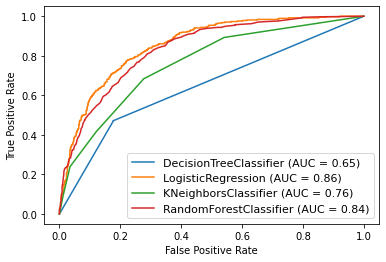

In [100]:
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)   #ax_ = Axies with confusion matrix
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [101]:
#Off all when I check for the data the Logistic regression seems to be the best so I would choose and load the Logistic Regression

In [103]:
import pickle
customer_churn = 'finalized_model.pickle'
pickle.dump(lr,open(customer_churn,'wb'))

In [104]:

scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)

In [106]:
loaded_model=pickle.load(open(customer_churn,'rb'))
a=loaded_model.predict(scaler.transform(x))

# Thank You